# Model Capstone Product Based CH2-PS081

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/15ST_2Nmqlw3cw8U8Q_wHqPyaKd1YXTzq#scrollTo=J6Z17h4pO9VT"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/recommenders/blob/main/docs/examples/quickstart.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import uuid
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
url = 'https://github.com/MITA-Team/Machine-Learning/raw/main/Datasets.csv'
data = pd.read_csv(url)
data.head(5)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,Physical,Total,Age_Years,Sex,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits,Therapy,Percentage
0,1,0,0,0,0,0,0,1,1,0,...,2,3,2,1,1,0,0,0,9,[0:2:2:2]
1,2,1,1,0,0,0,1,1,0,0,...,1,4,3,0,1,0,0,1,5,[1:2:1:4]
2,3,1,0,0,0,0,0,1,1,0,...,2,4,3,0,1,0,0,1,8,[1:3:2:3]
3,4,1,1,1,1,1,1,1,1,1,...,3,10,2,0,0,0,0,1,4,[3:4:3:9]
4,5,1,1,0,1,1,1,1,1,1,...,3,9,2,1,0,1,0,1,8,[2:4:3:8]


# Model Klasifikasi ASD

In [3]:
# Menginisialisasi data label dan input
X = data.drop(['Therapy', 'ASD_traits', 'Percentage', 'Case_No'], axis=1)
Y = data['ASD_traits']

In [4]:
# Split data dengan Training data 90% dan validation data 10%
training_size= int(len(data)*0.9)

X_train = X[:training_size]
X_test = X[training_size:]
Y_train = Y[:training_size]
Y_test = Y[training_size:]

In [5]:
# Model Klasifikasi ASD
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='linear')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               10752     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 101249 (395.50 KB)
Trainable params: 10124

In [6]:
model1.compile(optimizer='Adam', loss='mean_squared_error')
history_classification=model1.fit(X_train, Y_train, epochs=50, batch_size=50, validation_data=(X_test, Y_test))

Epoch 1/50
41/41 [==============================] - 5s 19ms/step - loss: 0.1219 - val_loss: 0.0567
Epoch 2/50
41/41 [==============================] - 0s 6ms/step - loss: 0.0534 - val_loss: 0.0339
Epoch 3/50
41/41 [==============================] - 0s 6ms/step - loss: 0.0372 - val_loss: 0.0358
Epoch 4/50
41/41 [==============================] - 0s 7ms/step - loss: 0.0316 - val_loss: 0.0218
Epoch 5/50
41/41 [==============================] - 0s 6ms/step - loss: 0.0231 - val_loss: 0.0158
Epoch 6/50
41/41 [==============================] - 0s 7ms/step - loss: 0.0224 - val_loss: 0.0230
Epoch 7/50
41/41 [==============================] - 0s 7ms/step - loss: 0.0177 - val_loss: 0.0131
Epoch 8/50
41/41 [==============================] - 0s 6ms/step - loss: 0.0145 - val_loss: 0.0100
Epoch 9/50
41/41 [==============================] - 0s 6ms/step - loss: 0.0119 - val_loss: 0.0080
Epoch 10/50
41/41 [==============================] - 0s 7ms/step - loss: 0.0103 - val_loss: 0.0104
Epoch 11/50
41/41 

Evaluasi model classification

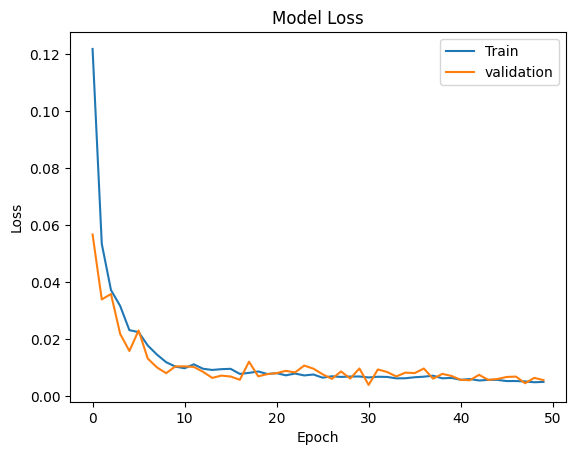

In [7]:
plt.plot(history_classification.history['loss'])
plt.plot(history_classification.history['val_loss'])
plt.title('Model Loss')
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'])
plt.show()

# Model Rekomendasi

In [8]:
# Menginisialisasi fitur dan label untuk sistem rekomendasi
label_encoder = LabelEncoder()
therapy = label_encoder.fit_transform(data['Therapy'])
features = data[['Speech', 'Sensory', 'Physical', 'Social', 'Total','ASD_traits']]

In [9]:
# Split data training 90% dan testing 10%
x_train = features[:training_size]
x_test = features[training_size:]
y_train = therapy[:training_size]
y_test = therapy[training_size:]

# Normalize data
x_train_norm = ((x_train * x_train.mean())/x_train.std()).to_numpy()
x_test_norm = ((x_test * x_test.mean())/x_test.std()).to_numpy()

# One hot encoding labels
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=12)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=12)

In [10]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(6,), activation="relu"),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(12, activation="softmax")])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               896       
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      


                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 12)                780       
                                                                 
Total params: 26444 (103.30 KB)
Trainable params: 26444 (103.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_reccomendations = model2.fit(x_train, y_train_encoded, epochs=10, batch_size=32, verbose=1, validation_data=(x_test,y_test_encoded))

Epoch 1/10
64/64 [==============================] - 3s 12ms/step - loss: 1.6146 - accuracy: 0.4510 - val_loss: 1.4534 - val_accuracy: 0.6106
Epoch 2/10
64/64 [==============================] - 0s 5ms/step - loss: 1.0142 - accuracy: 0.7265 - val_loss: 0.7836 - val_accuracy: 0.8009
Epoch 3/10
64/64 [==============================] - 0s 5ms/step - loss: 0.6309 - accuracy: 0.8512 - val_loss: 0.5605 - val_accuracy: 0.8628
Epoch 4/10
64/64 [==============================] - 0s 5ms/step - loss: 0.4924 - accuracy: 0.8901 - val_loss: 0.5459 - val_accuracy: 0.8717
Epoch 5/10
64/64 [==============================] - 0s 6ms/step - loss: 0.4299 - accuracy: 0.9069 - val_loss: 0.4983 - val_accuracy: 0.8982
Epoch 6/10
64/64 [==============================] - 0s 5ms/step - loss: 0.4026 - accuracy: 0.9182 - val_loss: 0.4243 - val_accuracy: 0.9071
Epoch 7/10
64/64 [==============================] - 0s 6ms/step - loss: 0.3644 - accuracy: 0.9276 - val_loss: 0.4341 - val_accuracy: 0.9071
Epoch 8/10
64/64 [=

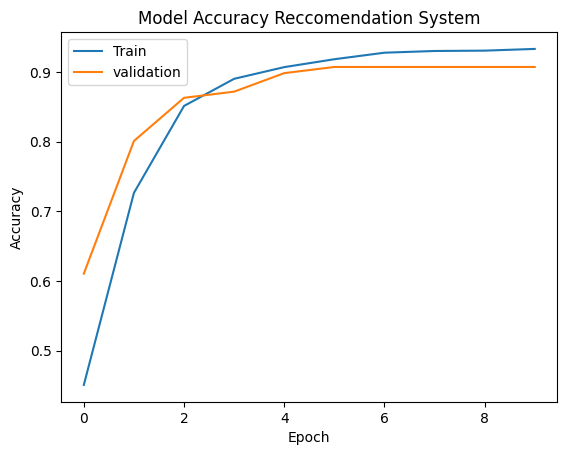

In [12]:
plt.plot(history_reccomendations.history['accuracy'])
plt.plot(history_reccomendations.history['val_accuracy'])
plt.title('Model Accuracy Reccomendation System')
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.show()

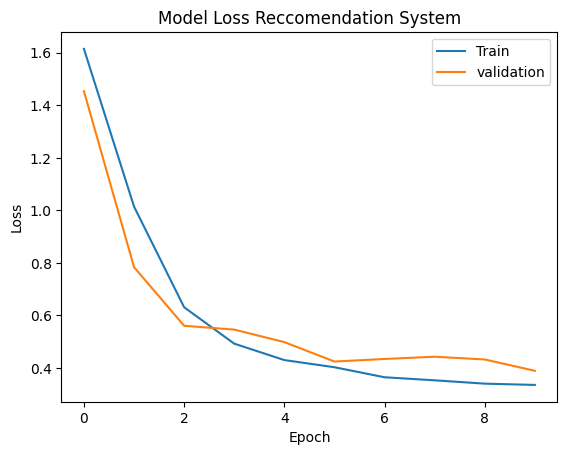

In [13]:
plt.plot(history_reccomendations.history['loss'])
plt.plot(history_reccomendations.history['val_loss'])
plt.title('Model Loss Reccomendation System')
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'])
plt.show()

# Prediksi model

Prediksi Klasifikasi

In [14]:
# Input Time!
input_A1 = int(input('A1: '))
input_A2 = int(input('A2: '))
input_A3 = int(input('A3: '))
input_A4 = int(input('A4: '))
input_A5 = int(input('A5: '))
input_A6 = int(input('A6: '))
input_A7 = int(input('A7: '))
input_A8 = int(input('A8: '))
input_A9 = int(input('A9: '))
input_A10 = int(input('A10: '))
input_speech = input_A1 + input_A5 + input_A3
input_social = input_A1 + input_A2 + input_A3 + input_A4 + input_A5+ input_A6 + input_A7 + input_A9 + input_A10
input_sensory = input_A1 + input_A6 + input_A8 + input_A10
input_physical = input_A7 + input_A8 + input_A9
input_total = input_A1 + input_A2 + input_A3 + input_A4 + input_A5 + input_A6 + input_A7 + input_A8 + input_A9 + input_A10
input_Ages_Years = int(input('Age: '))
input_Sex = int(input('Sex: '))
input_Jaudience = int(input('Jaudience: '))
input_Family_mem_with_ASD = int(input('Family_mem_with_ASD: '))
input_Who_completed_the_test = int(input('Who_completed_the_test: '))

In [15]:
input = [[input_A1, input_A2, input_A3, input_A4, input_A5, input_A6, input_A7,
      input_A8, input_A9, input_A10, input_speech, input_social, input_sensory,
      input_physical, input_total, input_Ages_Years, input_Sex, input_Jaudience,
      input_Family_mem_with_ASD, input_Who_completed_the_test]]
user_input = pd.DataFrame(input,
    columns=["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10",
             "Speech", "Sensory", "Physical", "Social", "Total", "Age_Years",
             "Sex", "Jaudience", "Family_mem_with_ASD","Who_completed_the_test"]
)

In [16]:
predictions = model1.predict(user_input)
# Mengevaluasi hasil prediksi (berdasarkan threshold 0.5)
predicted_labels = (predictions > 0.5).astype(int)
print()
if predicted_labels==1:
    print(f"{predictions} menunjukkan gejala ASD")
else:
    print(f"{predictions} tidak menunukkan gejala ASD")

1/1 [==============================] - 0s 264ms/step

[[0.9037226]] menunjukkan gejala ASD


Nama gambar:  12142f74-26a7-433c-8c75-101608924bb7.png


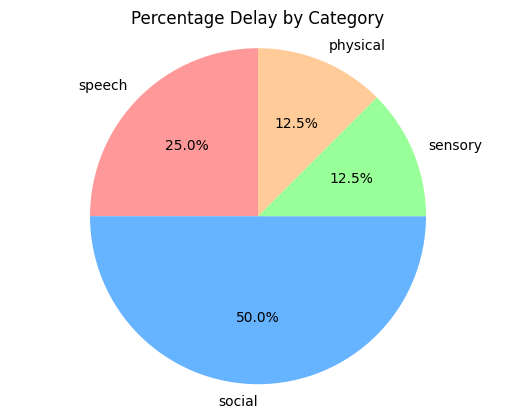

In [17]:
import matplotlib.pyplot as plt
import uuid
def percentage_delay(A):
    categories = ['speech', 'social', 'sensory', 'physical']
    a_cat_list = [
        [1, 1, 1, 0],
        [0, 1, 0, 0],
        [1, 1, 0, 0],
        [0, 1, 0, 0],
        [1, 1, 0, 0],
        [0, 1, 1, 0],
        [0, 1, 0, 1],
        [0, 0, 1, 1],
        [0, 1, 0, 1],
        [0, 1, 1, 0]
    ]

    total_cases = len(A)
    category_sums = {category: 0 for category in categories}

    for i in range(total_cases):
        current_a = A[i]

        if current_a == 1:
            current_a_cat = a_cat_list[i]
            for j in range(len(categories)):
                category_sums[categories[j]] += current_a_cat[j]

    # Calculate the total sum across all categories
    total_sum = sum(category_sums.values())

    # Calculate the percentage for each category
    category_percentages = {category: (count / total_sum) * 100 for category, count in category_sums.items()}

    # Create a pie chart
    labels = list(category_percentages.keys())
    sizes = list(category_percentages.values())

    #add colors
    colors = ["#ff9999","#66b3ff","#99ff99","#ffcc99"]

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.

    plt.title('Percentage Delay by Category')
    nama_gambar = str(uuid.uuid4()) + '.png'
    # Menyimpan gambar
    plt.savefig(nama_gambar)
    print('Nama gambar: ', nama_gambar)
    plt.show()
    

A = [input_A1, input_A2, input_A3, input_A4, input_A5, input_A6, input_A7, input_A8, input_A9, input_A10]
percentage_delay(A)

Melakukan prediksi untuk terapy

In [19]:
# Memasukkan prediksi ASD ke dalam frame yang sama
# Untuk selanjutnya masuk ke rekomendasi terapi
user_input['ASD_traits'] = predicted_labels
user_input = user_input[['Speech', 'Sensory', 'Physical', 'Social', 'Total', 'ASD_traits']]


In [20]:
predictions = model2.predict(user_input)
# Mengambil 5 hasil prediksi tertinggi
top_n = 3
top_indices = np.argsort(predictions[0])[::-1][:top_n]
top_probabilities = predictions[0][top_indices]

label_asli = {1: "Tiru Suara Fauna",
              2: "Abeceria Anak",
              3: "Wicara Terapi",
              4: "SociPlay Therapy",
              5: "InterActElevate Therapy",
              6: "SosioLeap Therapy",
              7: "Sentuhan Ajaib",
              8: "Colorful Vulcano",
              9: "Sensori Kreatif",
              10: "Rhythmika Anak",
              11: "Nature Play",
              12: "JoyMotion"}

# Menampilkan hasil prediksi dalam bentuk label asli
print(f"Top {top_n} Rekomendasi Terpi:")
for label, prob in zip(top_indices, top_probabilities):
    original_label = label_asli[label]
    print(f"{original_label}")

1/1 [==============================] - 0s 131ms/step
Top 3 Rekomendasi Terpi:
Colorful Vulcano
Sentuhan Ajaib
Tiru Suara Fauna


In [21]:
# Save model
model1.save("Model1.h5")
model2.save("Model2.h5")

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
# Konversi kedua model ke dalam format TFLite (.tflite)
converter1 = tf.lite.TFLiteConverter.from_keras_model(model1)
tflite_m1 = converter1.convert()

converter2 = tf.lite.TFLiteConverter.from_keras_model(model2)
tflite_m2 = converter2.convert()

combine_converter = tflite_m1 + tflite_m2
# Simpan kedua model TFLite ke dalam file yang sama
with open("Model.tflite", "wb") as f:
    f.write(combine_converter)

INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpg6rrrjyz\assets


INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpg6rrrjyz\assets


INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpsiusum6x\assets


INFO:tensorflow:Assets written to: C:\Users\ASUS\AppData\Local\Temp\tmpsiusum6x\assets
